In [1]:
import numpy as np
import argparse
import os, time


from pykin.utils import plot_utils as p_utils


from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=22, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-145057ee-deaa-4ce8-9968-4bc40f715cee.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.3838397  0.0446048  0.84779998]),
                           Object(name=bottle0, pos=[ 0.88990998 -0.22199561  0.87515735]),
                           Object(name=can0, pos=[0.38641148 0.42777457 0.83500836]),
                           Object(name=milk0, pos=[ 1.00925921 -0.40910832  0.83236691]),
                           Object(name=cereal0,

# Start Scene 

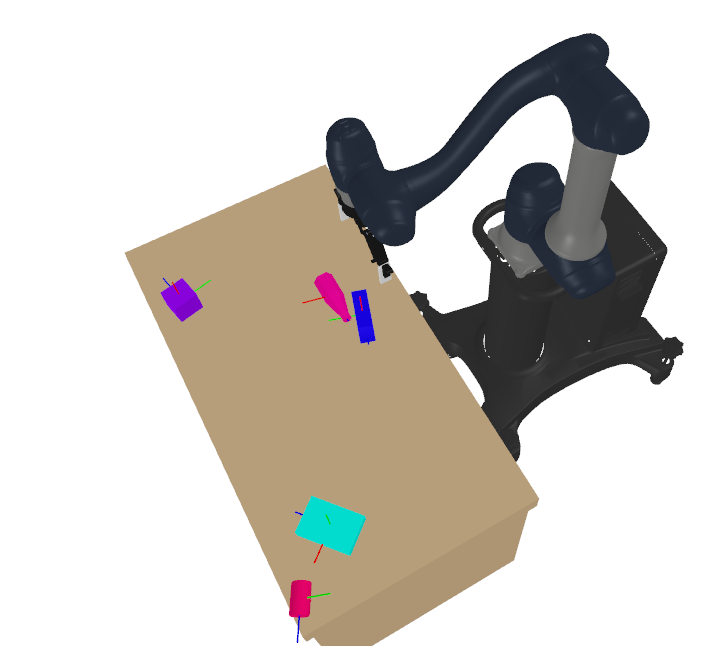

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.94785571 -0.37016598  0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 0.56003104 -0.17358895  0.83593753]), 'can0': Object(name=can0, pos=[1.00532615 0.55219687 0.83515389]), 'milk0': Object(name=milk0, pos=[ 0.51200809 -0.07475632  0.83236691]), 'cereal0': Object(name=cereal0, pos=[0.86241178 0.42575941 0.82529568])}


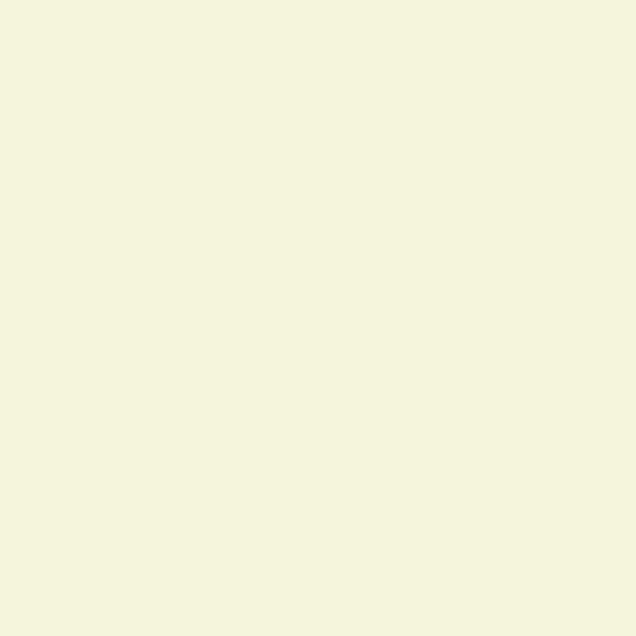

In [4]:
#######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# Goal Scene 

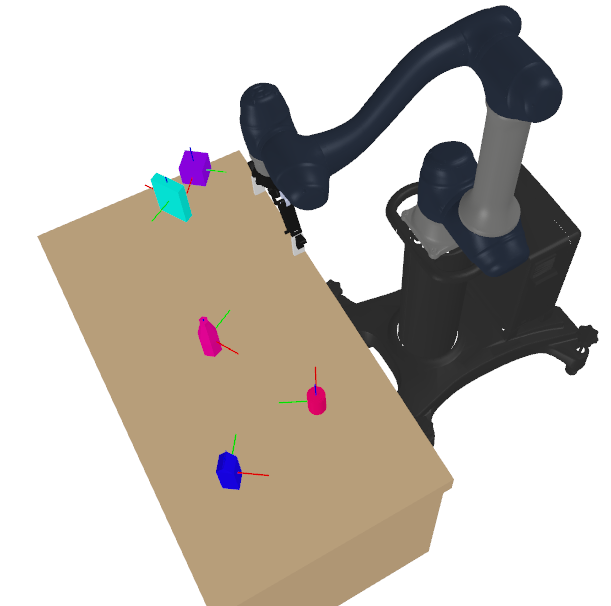

In [5]:
# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.52299741 -0.60857972  0.84779998]), 'bottle0': Object(name=bottle0, pos=[ 0.73996796 -0.0247427   0.87515735]), 'can0': Object(name=can0, pos=[0.56935326 0.27811939 0.85059666]), 'milk0': Object(name=milk0, pos=[0.85481675 0.34870143 0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.63858019 -0.50867853  0.88526188])}


In [2]:
c = 3
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [3]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 1 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(4) -> S'(6) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(6) -> A(8) -> S'(14) Reward : 3.333
[Action] Rearr cereal0
Good Action
[Reward] S(14) -> A(19) -> S'(21) Reward : 2.5
[Action] Rearr can0
placed another place not goal
[Reward] S(21) -> A(24) -> S'(27) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(27) -> A(30) -> S'(35) Reward : 1.667
[Action] Rearr bottle0
Bad Action
[Reward] S(35) -> A(37) -> S'(41) Reward : -3.333
[Action] Rearr cereal0
not bad Action
[Reward] S(41) -> A(47) -> S'(48) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(48) -> A(51) -> S'(54) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(54) -> A(58) -> S'(62) Reward : 1.0
[Action] Rearr bottle0
Good Action
[Reward] S(62) -> A(64) -> S'(69) Reward : 0.909
Exceeded the maximum depth!!
###

[Action] Rearr can0
placed another place not goal
[Reward] S(331) -> A(334) -> S'(337) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(337) -> A(340) -> S'(345) Reward : 1.429
[Action] Rearr can0
placed another place not goal
[Reward] S(345) -> A(348) -> S'(351) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(351) -> A(356) -> S'(358) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(358) -> A(359) -> S'(365) Reward : 1.0
[Action] Rearr cereal0
Good Action
[Reward] S(365) -> A(370) -> S'(372) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  10.879940032958984 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 7 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(264) -> A(265) -> S'(373) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(37

[Action] Rearr bottle0
Good Action
[Reward] S(637) -> A(639) -> S'(644) Reward : 1.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(644) -> A(648) -> S'(650) Reward : -1
Exceeded the maximum depth!!
########### Running time :  19.128110647201538 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 12 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr can0
Good Action
[Reward] S(264) -> A(267) -> S'(271) Reward : 3.333
[Action] Rearr can0
not bad Action
[Reward] S(271) -> A(654) -> S'(658) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(658) -> A(663) -> S'(664) Reward : -5.0
[Action] Rearr milk0
Good Action
[Reward] S(664) -> A(669) -> S'(672) Reward : 1.667
[Action] Rearr bottle0
placed another place not goal
[Reward] S(672) -> A(674) -> S'(678) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(678) -> A(680) -> S'(686) Reward : 1.25
[Action] Rear

[Action] Rearr can0
not bad Action
[Reward] S(917) -> A(920) -> S'(924) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(924) -> A(927) -> S'(930) Reward : -4.0
[Action] Rearr bottle0
not bad Action
[Reward] S(930) -> A(933) -> S'(938) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(938) -> A(942) -> S'(944) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(944) -> A(947) -> S'(951) Reward : -2.5
[Action] Rearr can0
Good Action
[Reward] S(951) -> A(955) -> S'(959) Reward : 1.0
[Action] Rearr milk0
Good Action
[Reward] S(959) -> A(963) -> S'(966) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  28.43195152282715 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 18 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(264) -> A(267) -> S'(270) Reward : -1
[Action] Rearr can0
pla

[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1159) -> A(1160) -> S'(1165) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(1165) -> A(1168) -> S'(1173) Reward : 1.25
[Action] Rearr ben_cube0
Good Action
[Reward] S(1173) -> A(1174) -> S'(1180) Reward : 1.111
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1180) -> A(1181) -> S'(1186) Reward : -2.222
[Action] Rearr ben_cube0
Good Action
[Reward] S(1186) -> A(1188) -> S'(1194) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  35.59912586212158 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 23 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(264) -> A(267) -> S'(270) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(270) -> A(274) -> S'(278) Reward : 2.5
[Action] Rearr cereal0
not bad Action
[Reward] S(278) -> A(283) -> S'(1196

placed another place not goal
[Reward] S(1401) -> A(1403) -> S'(1408) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1408) -> A(1412) -> S'(1415) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1415) -> A(1417) -> S'(1423) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  42.28142786026001 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 28 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(264) -> A(266) -> S'(493) Reward : -1
[Action] Rearr cereal0
not bad Action
[Reward] S(493) -> A(499) -> S'(1425) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(1425) -> A(1430) -> S'(1431) Reward : -5.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(1431) -> A(1433) -> S'(1439) Reward : 1.667
[Action] Rearr milk0
placed another place not goal
[Reward] S(1439) -> A(1443) ->

Bad Action
[Reward] S(1625) -> A(1630) -> S'(1631) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  48.45468306541443 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 33 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(264) -> A(267) -> S'(270) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(270) -> A(274) -> S'(278) Reward : 2.5
[Action] Rearr can0
Bad Action
[Reward] S(278) -> A(281) -> S'(1152) Reward : -5.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(1152) -> A(1154) -> S'(1634) Reward : 1.667
[Action] Rearr ben_cube0
not bad Action
[Reward] S(1634) -> A(1635) -> S'(1640) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1640) -> A(1641) -> S'(1646) Reward : -2.857
[Action] Rearr bottle0
Good Action
[Reward] S(1646) -> A(1649) -> S'(1654) Reward : 1.111
[Action] Rearr milk0
placed anot

[Action] Rearr ben_cube0
Good Action
[Reward] S(1842) -> A(1843) -> S'(1849) Reward : 1.25
[Action] Rearr can0
placed another place not goal
[Reward] S(1849) -> A(1852) -> S'(1855) Reward : -1
[Action] Rearr ben_cube0
not bad Action
[Reward] S(1855) -> A(1857) -> S'(1863) Reward : -1
[Action] Rearr bottle0
Bad Action
[Reward] S(1863) -> A(1865) -> S'(1869) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  55.47619032859802 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 39 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(264) -> A(267) -> S'(270) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(270) -> A(274) -> S'(278) Reward : 2.5
[Action] Rearr milk0
Good Action
[Reward] S(278) -> A(282) -> S'(285) Reward : 2.0
[Action] Rearr can0
Bad Action
[Reward] S(285) -> A(288) -> S'(291) Reward : -4.0
[Action]

Bad Action
[Reward] S(298) -> A(302) -> S'(2005) Reward : -2.857
[Action] Rearr bottle0
placed another place not goal
[Reward] S(2005) -> A(2008) -> S'(2012) Reward : -1
[Action] Rearr ben_cube0
not bad Action
[Reward] S(2012) -> A(2014) -> S'(2020) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(2020) -> A(2023) -> S'(2027) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  59.62267208099365 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 45 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(264) -> A(267) -> S'(270) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(270) -> A(274) -> S'(278) Reward : 2.5
[Action] Rearr milk0
Good Action
[Reward] S(278) -> A(282) -> S'(285) Reward : 2.0
[Action] Rearr can0
Bad Action
[Reward] S(285) -> A(288) -> S'(291) Reward : -4.0
[Action] Rearr ben_cube0
Good Ac

[Action] Rearr ben_cube0
not bad Action
[Reward] S(2119) -> A(2120) -> S'(2126) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(2126) -> A(2128) -> S'(2132) Reward : -1
Exceeded the maximum depth!!
########### Running time :  62.482173204422 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 51 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(264) -> A(267) -> S'(270) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(270) -> A(274) -> S'(278) Reward : 2.5
[Action] Rearr milk0
Good Action
[Reward] S(278) -> A(282) -> S'(285) Reward : 2.0
[Action] Rearr can0
Bad Action
[Reward] S(285) -> A(288) -> S'(291) Reward : -4.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(291) -> A(293) -> S'(298) Reward : 1.429
[Action] Rearr can0
Good Action
[Reward] S(298) -> A(301) -> S'(305) Reward : 1.25
[Action] Rearr

[Action] Rearr milk0
Good Action
[Reward] S(507) -> A(2283) -> S'(2286) Reward : 1.667
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2286) -> A(2287) -> S'(2292) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(2292) -> A(2297) -> S'(2299) Reward : -2.857
[Action] Rearr ben_cube0
Good Action
[Reward] S(2299) -> A(2301) -> S'(2307) Reward : 1.111
[Action] Rearr cereal0
not bad Action
[Reward] S(2307) -> A(2312) -> S'(2314) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2314) -> A(2317) -> S'(2320) Reward : -1
Exceeded the maximum depth!!
########### Running time :  68.72360944747925 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 57 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(264) -> A(266) -> S'(493) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward]

[Action] Rearr bottle0
Bad Action
[Reward] S(1983) -> A(2396) -> S'(2400) Reward : -2.5
[Action] Rearr can0
Good Action
[Reward] S(2400) -> A(2404) -> S'(2408) Reward : 1.0
[Action] Rearr bottle0
Good Action
[Reward] S(2408) -> A(2410) -> S'(2415) Reward : 0.909
##########['cereal0', 'milk0', 'ben_cube0', 'can0', 'bottle0']#############
Success!!!!!
Terminal State! Reward is 5
########### Running time :  71.31664490699768 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 64 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(264) -> A(266) -> S'(493) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(493) -> A(498) -> S'(500) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(500) -> A(502) -> S'(508) Reward : 2.0
[Action] Rearr milk0
Good Action
[Reward] S(508) -> A(512) -> S'(2417) Reward : 1.667
[

[Action] Rearr cereal0
not bad Action
[Reward] S(2521) -> A(2527) -> S'(2529) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(2529) -> A(2532) -> S'(2536) Reward : 1.111
[Action] Rearr cereal0
not bad Action
[Reward] S(2536) -> A(2541) -> S'(2543) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(2543) -> A(2544) -> S'(2550) Reward : 0.909
Exceeded the maximum depth!!
########### Running time :  76.32565450668335 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 72 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(264) -> A(267) -> S'(270) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(270) -> A(274) -> S'(278) Reward : 2.5
[Action] Rearr milk0
Good Action
[Reward] S(278) -> A(282) -> S'(285) Reward : 2.0
[Action] Rearr can0
Bad Action
[Reward] S(285) -> A(288) -> S'(291) Reward : -4.0
[Action] Rearr ben_cub

[Action] Rearr milk0
not bad Action
[Reward] S(2632) -> A(2637) -> S'(2640) Reward : -1
Exceeded the maximum depth!!
########### Running time :  78.80523920059204 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 79 ===========
[Action] Rearr can0
Good Action
[Reward] S(0) -> A(3) -> S'(200) Reward : 5.0
[Action] Rearr can0
not bad Action
[Reward] S(200) -> A(2643) -> S'(2647) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(2647) -> A(2651) -> S'(2653) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(2653) -> A(2658) -> S'(2661) Reward : 2.0
[Action] Rearr cereal0
Good Action
[Reward] S(2661) -> A(2666) -> S'(2668) Reward : 1.667
[Action] Rearr can0
Bad Action
[Reward] S(2668) -> A(2671) -> S'(2674) Reward : -3.333
[Action] Rearr cereal0
not bad Action
[Reward] S(2674) -> A(2680) -> S'(2681) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(2681) -> A(2683) -> S'(2688) Reward : 1.111
[Action] R

[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(2781) -> A(2783) -> S'(2788) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(2788) -> A(2793) -> S'(2795) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(2795) -> A(2798) -> S'(2802) Reward : -1
Exceeded the maximum depth!!
########### Running time :  83.52606391906738 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 85 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(264) -> A(267) -> S'(270) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(270) -> A(274) -> S'(278) Reward : 2.5
[Action] Rearr milk0
Good Action
[Reward] S(278) -> A(282) -> S'(285) Reward : 2.0
[Action] Rearr can0
Bad Action
[Reward] S(285) -> A(288) -> S'(291) Reward : -4.0
[Action] Rearr ben_cube0
Good Action
[Reward] S(291) -> A(293) -> 

[Action] Rearr bottle0
not bad Action
[Reward] S(2813) -> A(2816) -> S'(2821) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(2821) -> A(2822) -> S'(2827) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  84.20215725898743 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 91 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(264) -> A(266) -> S'(493) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(493) -> A(498) -> S'(500) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(500) -> A(502) -> S'(508) Reward : 2.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(508) -> A(510) -> S'(514) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(514) -> A(518) -> S'(521) Reward : 1.429
[Action] Rearr bottle0
placed another place not goal
[Reward] S(521) -> 

[Action] Rearr bottle0
Good Action
[Reward] S(2902) -> A(2905) -> S'(2910) Reward : 1.0
[Action] Rearr ben_cube0
Bad Action
[Reward] S(2910) -> A(2911) -> S'(2916) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  86.64063262939453 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 3, Seed: 22
=========== Search iteration : 97 ===========
[Action] Rearr cereal0
Good Action
[Reward] S(0) -> A(5) -> S'(264) Reward : 5.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(264) -> A(266) -> S'(493) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(493) -> A(498) -> S'(500) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(500) -> A(502) -> S'(508) Reward : 2.0
[Action] Rearr bottle0
placed another place not goal
[Reward] S(508) -> A(510) -> S'(514) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(514) -> A(518) -> S'(521) Reward : 1.429
[Action] Rearr cereal0
not bad Action
[Reward] S(521) -> A(526) -> S'(2919

In [4]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value

12.489682539682542

In [25]:
i=5
mcts.tree.nodes[i]['value_history']

[7.589682539682542,
 -3.562337662337663,
 -5.455555555555556,
 -7.3242424242424224,
 -2.066666666666666,
 -4.395670995670997,
 -3.066666666666666,
 -3.9714285714285724,
 -12.455555555555554,
 -9.15,
 -13.657575757575756,
 -5.407575757575758,
 -3.9714285714285724,
 -2.1936507936507943,
 4.87020202020202,
 -8.038888888888888,
 -8.7015873015873,
 -3.7333333333333334,
 -9.757142857142856,
 -1.9075757575757581,
 6.37857142857143,
 -4.717460317460318,
 -1.2214285714285724,
 -1.4833333333333343,
 -4.490909090909091,
 -7.149999999999999,
 -4.146031746031745,
 -5.1417027417027406,
 -6.511111111111109,
 -3.2214285714285724,
 -3.9714285714285724,
 4.937662337662337,
 -3.2845598845598856,
 -3.8285714285714283,
 -3.8285714285714283,
 -6.193650793650793,
 -4.848051948051947,
 -3.082539682539683,
 -5.4714285714285715,
 -1.9714285714285724,
 -4.824242424242423,
 -3.9714285714285724,
 6.37857142857143,
 -5.4714285714285715,
 -3.9714285714285724,
 -3.9714285714285724,
 -1.9714285714285724,
 -1.221428571

In [18]:
mcts.history_level_1_dict

{0: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   282,
   285,
   288,
   291,
   293,
   298,
   301,
   305,
   307,
   312],
  'value': 12.489682539682542},
 1: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   281,
   997,
   998,
   1003,
   1005,
   1010,
   1012,
   1018,
   1022,
   1025,
   1027,
   1031,
   1034,
   1039],
  'value': 9.77020202020202},
 2: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   281,
   997,
   1002,
   1238,
   1240,
   1244,
   1248,
   1251,
   1253,
   1258,
   1259,
   1265],
  'value': 11.27857142857143},
 3: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   281,
   997,
   1002,
   1238,
   1240,
   1244,
   1246,
   1587,
   1592,
   1594,
   1595,
   1601,
   1605,
   1608],
  'value': 9.837662337662337},
 4: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   281,
   997,
   1002,
   1238,
   1240,
   1244,
   1248,
   1251,
   1252,
   1828,
   1830,
   1836],
  'value': 1

In [9]:
########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j}: ", max_value_nodes)
    mcts.render_rearr("_", max_value_nodes)

Result 0:  [0, 5, 264, 267, 270, 274, 278, 282, 285, 288, 291, 293, 298, 301, 305, 307, 312]


In [10]:
idx = 0
val_ = -np.inf
for k,v in mcts.history_level_1_dict.items():
    if val_ < v['value']:
        idx = k
        val_ = v['value']
        
max_value_nodes = mcts.history_level_1_dict[2]['nodes']
mcts.render_rearr("_", max_value_nodes)
# idx, max_value_nodes

In [37]:
mcts.history_level_1_dict

{0: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   282,
   285,
   288,
   291,
   293,
   298,
   301,
   305,
   307,
   312],
  'value': 12.489682539682542},
 1: {'nodes': [0,
   5,
   264,
   266,
   493,
   498,
   500,
   502,
   508,
   510,
   514,
   518,
   521,
   525,
   528,
   530,
   535],
  'value': 11.989682539682542},
 2: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   282,
   285,
   288,
   291,
   293,
   298,
   300,
   1983,
   2396,
   2400,
   2404,
   2408,
   2410,
   2415],
  'value': 10.587662337662339},
 3: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   282,
   285,
   288,
   291,
   293,
   298,
   301,
   305,
   307,
   311,
   2135,
   2631],
  'value': 11.27857142857143},
 4: {'nodes': [0,
   5,
   264,
   267,
   270,
   274,
   278,
   282,
   285,
   288,
   291,
   293,
   298,
   301,
   305,
   307,
   311,
   2135,
   2630,
   2805,
   2812],
  'value': 10.087662337662337}}

In [48]:
mcts.tree.nodes[0]['state'],mcts.tree.nodes[264]['state']

(<pytamp.scene.scene.Scene at 0x7f74f51aad30>,
 <pytamp.scene.scene.Scene at 0x7f7437ff0ca0>)

In [16]:
mcts.rearr_action.info.REARR_OBJ_NAME

'rearr_obj_name'

In [16]:
mcts.tree.nodes[389]

{'depth': 5,
 'state': <pytamp.scene.scene.Scene at 0x7f74369a21c0>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'ben_cube0',
  'rearr_poses': [{'ben_cube0': array([[ 0.50390929,  0.86375658,  0.        ,  0.55156726],
           [-0.86375658,  0.50390929,  0.        ,  0.03488867],
           [ 0.        ,  0.        ,  1.        ,  0.84779998],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])},
   {'ben_cube0': array([[-0.40998322,  0.91209307,  0.        ,  0.86205615],
           [-0.91209307, -0.40998322,  0.        ,  0.01078561],
           [ 0.        ,  0.        ,  1.        ,  0.84779998],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': -inf,
 'value_history': [],
 'visit': 0,
 'number': 389,
 'type': 'action',
 'joints': [],
 'level1': False,
 'level2': False,
 'success': False,
 'cost': 0,
 'test': ()}

=========== Search iteration : 1 ===========
[Action] Rearr Bowl0
Good Action
[Reward] S(0) -> A(2) -> S'(6) Reward : 5.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(6) -> A(9) -> S'(11) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(11) -> A(16) -> S'(17) Reward : -1
[Action] Rearr bottle0
placed another place not goal
[Reward] S(17) -> A(22) -> S'(23) Reward : -1
[Action] Rearr Canister0
Good Action
[Reward] S(23) -> A(25) -> S'(30) Reward : 1.0
[Action] Rearr Canister0
not bad Action
[Reward] S(30) -> A(31) -> S'(36) Reward : -1
[Action] Rearr Bowl0
not bad Action
[Reward] S(36) -> A(38) -> S'(42) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(42) -> A(45) -> S'(48) Reward : 0.625
[Action] Rearr Canister0
not bad Action
[Reward] S(48) -> A(49) -> S'(54) Reward : -1
[Action] Rearr bottle0
Good Action
[Reward] S(54) -> A(58) -> S'(60) Reward : 0.5
##########['Bowl0', 'Canister0', 'ben_cube0', 'bottle0']#############
Succe

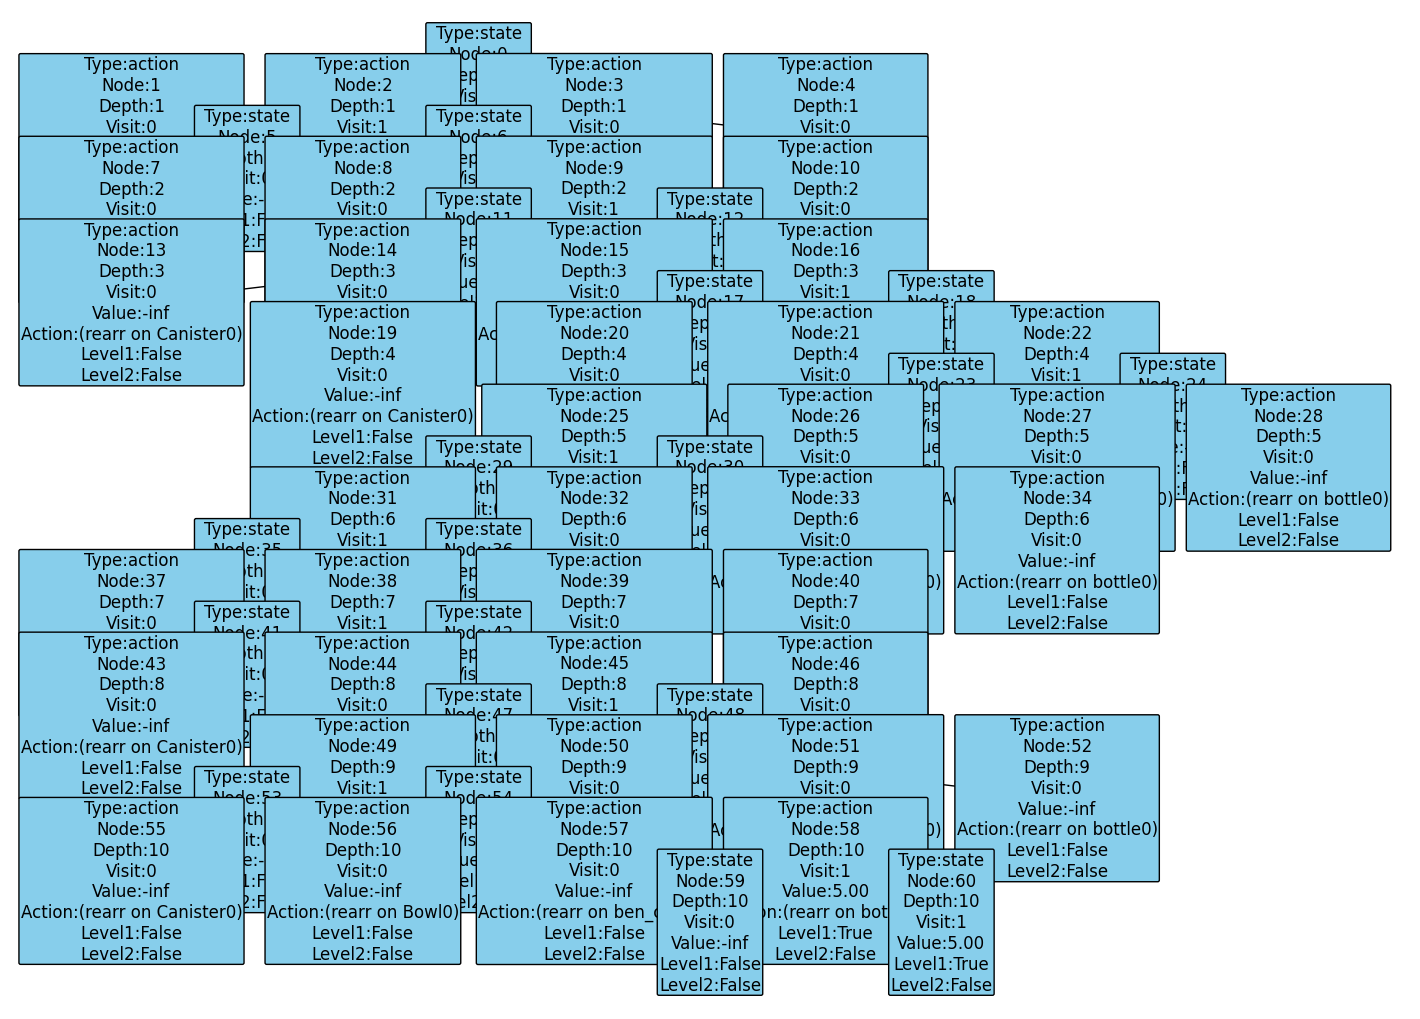

In [6]:
mcts.do_planning_rearrange(0)

mcts.visualize_tree("Siccess nodes", mcts.tree)

# Scene collision info 

In [ ]:
col_info = {}

def get_h_mat(position=np.zeros(3), orientation=np.array([1.0, 0.0, 0.0, 0.0])):
    """
    Returns homogeneous matrix from position and orientation
    """
    position = np.asarray(position)
    orientation = np.asarray(orientation)
    if orientation.shape == (3,):  # RPY Euler angles
        R = get_matrix_from_rpy(orientation)
    elif orientation.shape == (4,):  # quaternion in the form [x,y,z,w]
        R = get_matrix_from_quaternion(orientation)
    elif orientation.shape == (3, 3):  # Rotation matrix
        R = orientation

    H = np.vstack((np.hstack((R, position.reshape(-1, 1))), np.array([[0, 0, 0, 1]])))
    return H

for name, info in mcts.init_scene.collision_manager._objs.items():
    T = get_h_mat(
        position=info["obj"].getTranslation(),
        orientation=info["obj"].getRotation(),
    )
    col_info[name] = T

# Collision check

In [13]:
max_value_nodes

[0,
 4,
 179,
 184,
 1126,
 1131,
 1134,
 1139,
 1141,
 1144,
 1147,
 4142,
 4143,
 4148,
 4151,
 4153,
 4158,
 4159,
 4165]

In [14]:
idx = 4148
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'milk0': array([[ 0.96655143, -0.25647288,  0.        ,  0.88596138],
       [ 0.25647288,  0.96655143,  0.        , -0.40701088],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'milk0': array([[ 0.49220865,  0.87047725,  0.        ,  0.81366052],
       [-0.87047725,  0.49220865,  0.        ,  0.0371563 ],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [15]:
idx = 4153
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'bottle0': array([[-0.14103772,  0.99000422,  0.        ,  0.82751786],
       [-0.99000422, -0.14103772,  0.        , -0.4207895 ],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'bottle0': array([[-0.05088925, -0.9987043 ,  0.        ,  0.62542366],
       [ 0.9987043 , -0.05088925,  0.        , -0.24336767],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [23]:
mcts.render_rearr_state( None,title =  '_', state = mcts.tree.nodes[idx]['state'])

In [25]:
mcts.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.7449755  0.50675499 0.84779998]),
 'bottle0': Object(name=bottle0, pos=[ 0.74971138 -0.29269512  0.83593753]),
 'can0': Object(name=can0, pos=[0.58752796 0.31872161 0.83500836]),
 'milk0': Object(name=milk0, pos=[ 0.47826872 -0.11880885  0.83236691])}

In [24]:
idx, list(mcts.rearr_action.get_goal_location_not_collision(mcts.tree.nodes[idx]['state'],mcts.tree.nodes[idx]['action']['rearr_poses']))

(862,
 [{'can0': array([[ 0.71035039, -0.70384822,  0.        ,  0.7415683 ],
          [ 0.70384822,  0.71035039,  0.        , -0.55474858],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])},
  {'can0': array([[-0.17171101,  0.98514736,  0.        ,  0.83996994],
          [-0.98514736, -0.17171101,  0.        , -0.27054348],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])}])

In [47]:
mcts.scene_mngr.obj_collision_mngr.get_collision_info()

{'table': array([[ 1.   ,  0.   ,  0.   ,  1.   ],
        [ 0.   ,  1.   ,  0.   , -0.6  ],
        [ 0.   ,  0.   ,  1.   ,  0.043],
        [ 0.   ,  0.   ,  0.   ,  1.   ]]),
 'ben_cube0': array([[ 0.        ,  0.78165694, -0.62370861,  0.84763533],
        [ 0.        ,  0.62370861,  0.78165694,  0.36753831],
        [ 1.        ,  0.        ,  0.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[-0.65291822,  0.75742841,  0.        ,  0.83010826],
        [-0.75742841, -0.65291822,  0.        , -0.20864996],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'ben_cube1': array([[-0.17287648,  0.98494351,  0.        ,  0.49591774],
        [ 0.98494351,  0.17287648,  0.        ,  0.45601634],
        [ 0.        ,  0.        , -1.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[-0.81254636,  

In [18]:
for name, obj in mcts.rearr_action.scene_mngr.scene.objs.items():
    print(name, obj.h_mat)

table [[ 1.     0.     0.     1.   ]
 [ 0.     1.     0.    -0.6  ]
 [ 0.     0.     1.     0.043]
 [ 0.     0.     0.     1.   ]]
ben_cube0 [[-0.34614189 -0.93818217  0.          0.46298891]
 [ 0.93818217 -0.34614189  0.          0.02937996]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle0 [[-0.65291822  0.75742841  0.          0.83010826]
 [-0.75742841 -0.65291822  0.         -0.20864996]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
ben_cube1 [[-0.19514173  0.98077505  0.          0.96563102]
 [-0.98077505 -0.19514173  0.          0.29412445]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle1 [[-0.81254636  0.58289657  0.          0.38289801]
 [-0.58289657 -0.81254636  0.          0.37264649]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]


In [26]:
from copy import deepcopy
a = 2
b = deepcopy(a)
a==b

True